# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 
from pprint import pprint 



In [13]:
# Import API key
# from api_keys import weather_api_key

# !pip install python-dotenv

In [14]:
import os
from dotenv import load_dotenv
load_dotenv()

weather_api_key = os.getenv("weather_api_key")
g_key = os.getenv("g_key")



In [15]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
city_list = []
country_list = []
lat_list = []
lon_list = []
temp_list = []
humid_list = []
cloudiness_list = []
wind_list = []
descr_list = []
sunrise_list = []


all_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
for city in cities[0:629]:
    try: 
        # city = cities[0]
        city_data = requests.get(f'{url}&q={city.replace(" ", "+")}').json()
        # pprint(city_data)
        data = {
            "City" : city_data["name"] ,
            "Country": city_data["sys"]["country"],
            "Latitude": city_data["coord"]["lat"],
            "Longitude": city_data["coord"]["lon"],
            "Temperature": city_data["main"]["temp"],
            "Humidity": city_data["main"]["humidity"],
            "Cloudiness": city_data["clouds"]["all"],
            "Wind Speed": city_data["wind"]["speed"],
            "Description": city_data["weather"][0]["description"],
            "Sunrise": city_data["sys"]["sunrise"]
        }
        all_data.append(data)
        
        # country_list.append(city_data["sys"]["country"])
        # lat_list.append(city_data["coord"]["lat"])
        # lon_list.append(city_data["coord"]["lon"])
        # temp_list.append(city_data["coord"]["lat"])
        # humid_list.append(city_data["main"]["humidity"])
        # cloudiness_list.append(city_data["main"]["cloudiness"])
        # wind_list.append(city_data["wind"]["speed"])
        # descr_list.append(city_data["weather"][0]["description"])
        # sunrise_list.append(city_data["sys"]["sunrise"])
        # city_list.append(city)
    except:
        # print(f"{city} not found")   
        pass 
# cities_df = pd.DataFrame({
#     "City" : city_list ,
#     "Country": country_list,
#     "Latitude": lat_list,
#     "Longitude": lon_list,
#     "Temperature": temp_list,
#     "Humidity": humid_list,
#     # "Cloudiness": cloudiness_list,
#     # "Wind Speed": wind_list,
#     # "Description": descr_list,
#     # "Sunrise": sunrise_list
    
# })
# cities_df.to_csv("OpenweatherMap_cities.csv")
# cities_df


In [18]:
# import json
# print(json.dumps(city_data, indent=4))

In [19]:
# {
#     "City" : city_list ,
#     "Country": country_list,
#     "Latitude": lat_list,
#     "Longitude": lon_list,
#     "Temperature": temp_list,
#     "Humidity": humid_list,
#     # "Cloudiness": cloudiness_list,
#     # "Wind Speed": wind_list,
#     # "Description": descr_list,
#     # "Sunrise": sunrise_list
    
# }

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
cities_df = pd.DataFrame(all_data)
cities_df.to_csv("OpenweatherMap_cities.csv")
cities_df

cities_df


,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Sunrise
0,Nelson Bay,AU,-32.7167,152.1500,46.29,83,0,5.79,moderate rain,1630181589
1,Tuktoyaktuk,CA,69.4541,-133.0374,51.80,82,90,9.22,overcast clouds,1630155386
2,Port Alfred,ZA,-33.5906,26.8910,49.78,76,59,10.45,light rain,1630125349
3,Castro,BR,-24.7911,-50.0119,55.27,98,100,9.80,overcast clouds,1630143338
4,Butaritari,KI,3.0707,172.7902,82.67,74,34,10.51,light rain,1630175082
...,...,...,...,...,...,...,...,...,...,...
572,Bañga,PH,6.4239,124.7783,73.29,92,20,0.96,few clouds,1630186468
573,Marzuq,YE,14.4000,46.4667,83.89,41,44,1.23,scattered clouds,1630204929
574,Ampanihy,MG,-24.7000,44.7500,68.54,52,0,9.98,clear sky,1630206948
575,Kolokani,ML,13.5728,-8.0339,76.89,83,75,9.64,broken clouds,1630131642


In [23]:
cities_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Sunrise
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.045335,18.631831,67.309099,71.821490,54.545927,7.243934,1.630164e+09
std,33.133653,89.359408,15.197100,21.617035,38.766955,5.073435,2.858780e+04
min,-54.800000,-179.166700,31.980000,4.000000,0.000000,0.000000,1.630112e+09
25%,-8.650000,-61.748500,54.840000,63.000000,13.000000,3.440000,1.630141e+09
50%,22.285500,23.433300,70.450000,77.000000,62.000000,6.150000,1.630158e+09
75%,46.433300,96.128500,78.850000,88.000000,93.000000,9.640000,1.630189e+09
max,78.218600,179.316700,103.320000,100.000000,100.000000,29.930000,1.630260e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

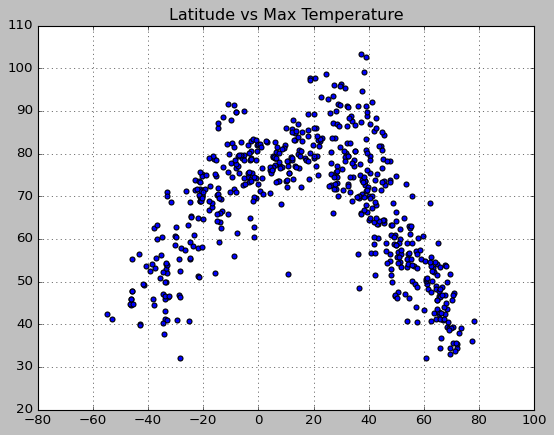

In [95]:
x_val = cities_df['Latitude']
y_val = cities_df['Temperature']
plt.scatter(x_val, y_val)
# plt.xlabel("Latitude")
# plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature")
plt.style.use("classic")
plt.grid()
plt.savefig("Latitude vs Max Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

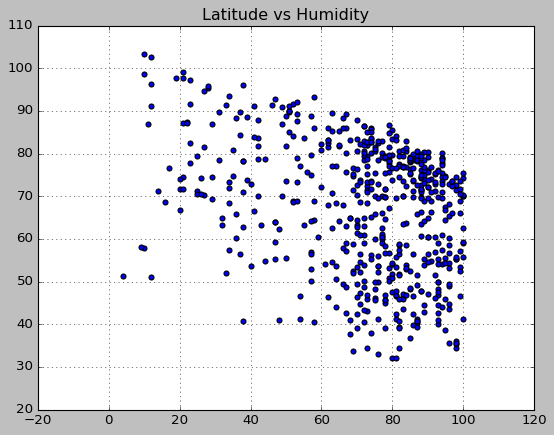

In [94]:
x_val = cities_df['Humidity']
y_val = cities_df['Temperature']
plt.scatter(x_val, y_val)
# plt.xlabel('Latitude')
# plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.style.use("classic")
plt.grid()
plt.savefig("Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

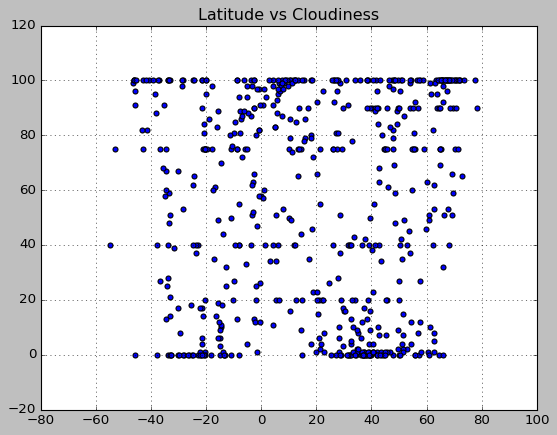

In [92]:
x_val = cities_df['Latitude']
y_val = cities_df['Cloudiness']
plt.scatter(x_val, y_val)
# plt.xlabel('Latitude')
# plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.style.use("classic")
plt.grid()
plt.savefig("Latitude vs Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

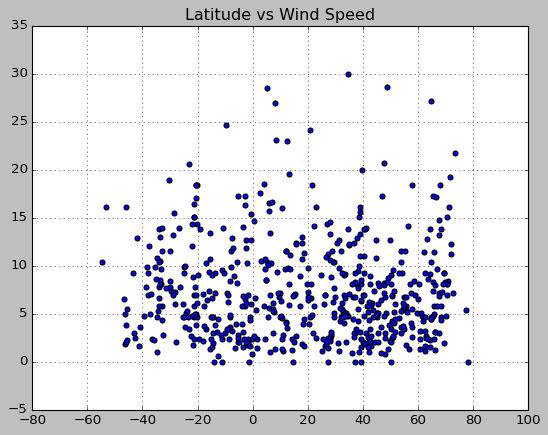

In [91]:
x_val = cities_df['Latitude']
y_val = cities_df['Wind Speed']
plt.scatter(x_val, y_val)
# plt.xlabel('Latitude')
# plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.style.use("classic")
plt.grid()
plt.savefig("Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [86]:
#Northern and Southern df

L = 0 
Northern_Hem = cities_df.query(f'Latitude >= {L}')
Southern_Hem = cities_df.query(f'Latitude <= {L}')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

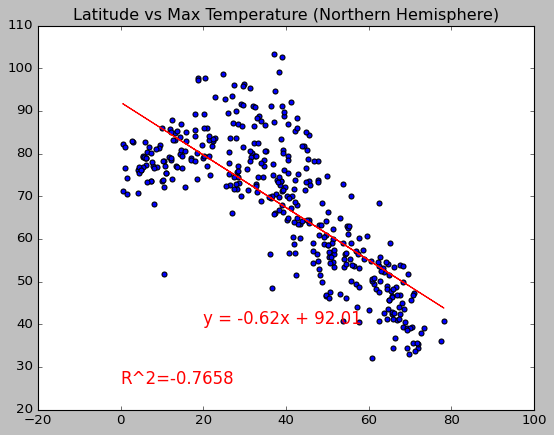

R2= -0.7658307016716034


In [115]:
x_value = Northern_Hem["Latitude"]
y_value = Northern_Hem["Temperature"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (20,40), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temperature (Northern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (0,26), fontsize=15, color="red")
plt.savefig("Latitude vs Max Temperature (Northern Hemisphere).png")
plt.show()
print("R2=",revalue)



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

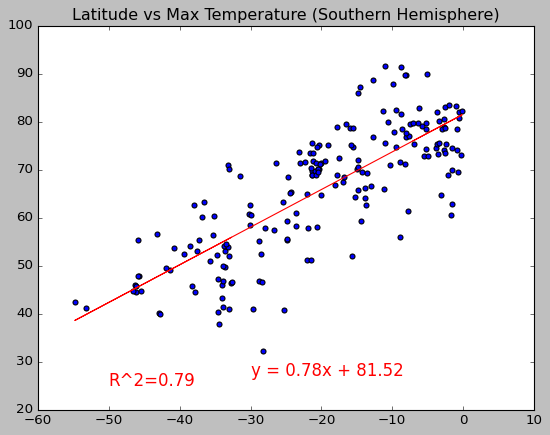

R2= 0.790011490502189


In [114]:
x_value = Southern_Hem["Latitude"]
y_value = Southern_Hem["Temperature"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (-30,27), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temperature (Southern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (-50,25), fontsize=15, color="red")
plt.savefig("Latitude vs Max Temperature (Southern Hemisphere).png")
plt.show()
print("R2=",revalue)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

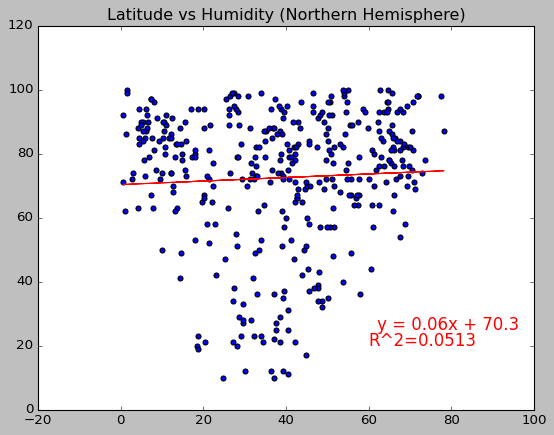

R2= 0.051257990374693654


In [110]:
x_value = Northern_Hem["Latitude"]
y_value = Northern_Hem["Humidity"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (62,25), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Humidity (Northern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (60,20), fontsize=15, color="red")
plt.savefig("Latitude vs Humidity (Northern Hemisphere).png")
plt.show()
print("R2=",revalue)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

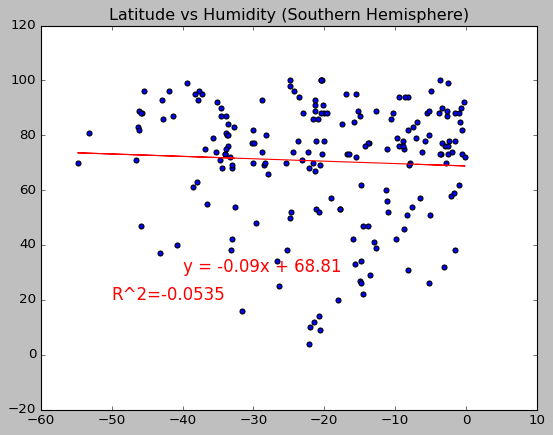

R2= -0.05350760479865778


In [103]:
x_value = Southern_Hem["Latitude"]
y_value = Southern_Hem["Humidity"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (-40,30), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Humidity (Southern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (-50,20), fontsize=15, color="red")
plt.savefig("Latitude vs Humidity (Southern Hemisphere).png")
plt.show()
print("R2=",revalue)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

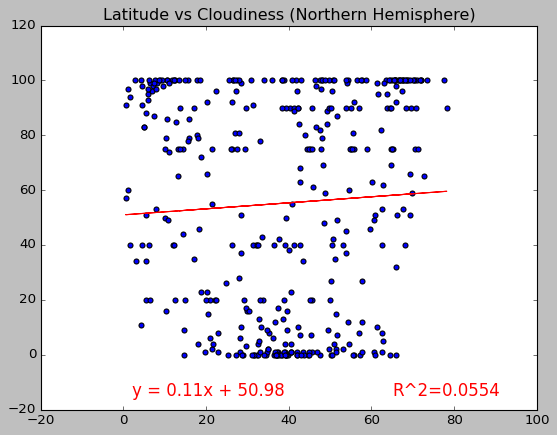

R2= 0.05539781379617356


In [104]:
x_value = Northern_Hem["Latitude"]
y_value = Northern_Hem["Cloudiness"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (2,-15), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Cloudiness (Northern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (65,-15), fontsize=15, color="red")
plt.savefig("Latitude vs Cloudiness (Northern Hemisphere).png")
plt.show()
print("R2=",revalue)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

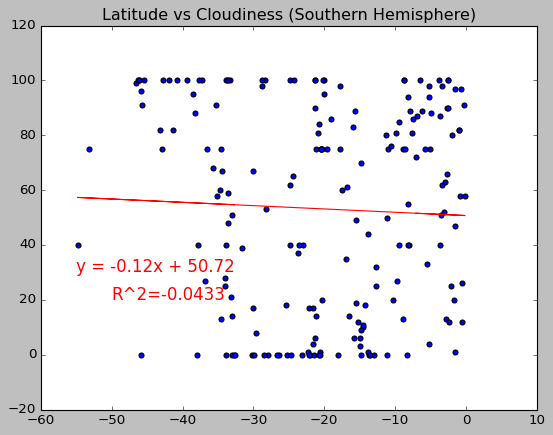

R2= -0.043297970582515895


In [105]:
x_value = Southern_Hem["Latitude"]
y_value = Southern_Hem["Cloudiness"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (-55,30), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Cloudiness (Southern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (-50,20), fontsize=15, color="red")
plt.savefig("Latitude vs Cloudiness (Southern Hemisphere).png")
plt.show()
print("R2=",revalue)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

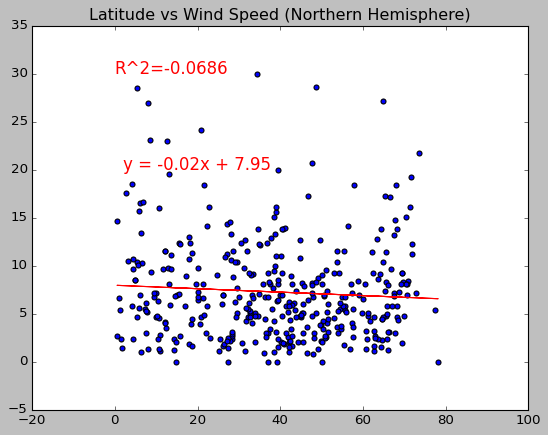

R2= -0.06855544088826637


In [107]:
x_value = Northern_Hem["Latitude"]
y_value = Northern_Hem["Wind Speed"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (2,20), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Wind Speed (Northern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (0,30), fontsize=15, color="red")
plt.savefig("Latitude vs Wind Speed (Northern Hemisphere).png")
plt.show()
print("R2=",revalue)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

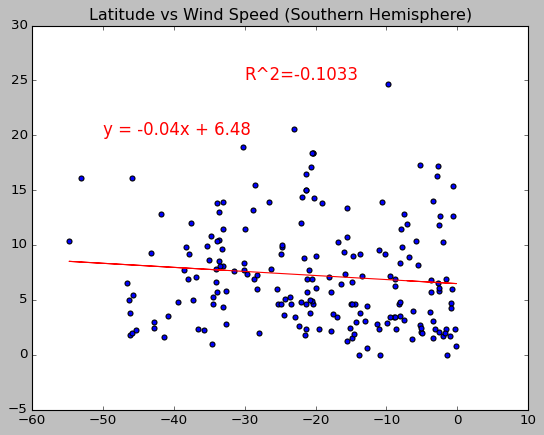

R2= -0.10330319274276088


In [119]:
x_value = Southern_Hem["Latitude"]
y_value =Southern_Hem["Wind Speed"]


(slope, intercept, revalue, pvalue ,stderr) = linregress(x_value,y_value)
regress = intercept+slope*x_value
line_equation = "y = " + str(round(slope,2)) +"x + " + str(round(intercept ,2))

#PLot

plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_equation, (-50,20), fontsize=15, color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temperature')
plt.title("Latitude vs Wind Speed (Southern Hemisphere)")
plt.style.use("classic")
R2 = "R^2=" + str(round(revalue,4))
plt.annotate(R2, (-30,25), fontsize=15, color="red")
plt.savefig("Latitude vs Wind Speed (Southern Hemisphere).png")
plt.show()
print("R2=",revalue)